<a href="https://colab.research.google.com/github/anapaulaaraujo/machine_learning_classification/blob/main/ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pré Processamento

## Importacao de bibliotecas

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #biblioteca para visualização de graficos
import matplotlib.pyplot as plt
import plotly.express as px #biblioteca para graficos dinamicos

##Base de dados de credito
Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset

In [4]:
base_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_data.csv')

In [5]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [6]:
base_credit.head() #busca os 5 primeiros registros
base_credit.tail() #busca o 5 ultimos registros 
base_credit.head(8) #busca os 8 primeiros registros



,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1


In [7]:
base_credit.describe() #comando do pandas, dados estatisticos descritivos das colunas

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
base_credit[base_credit['income'] >= 69995.685578] #pesquisa para saber quem ganha o max, >= por questao de arredondamento


,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [9]:
#unique conta os valores unicas daquela coluna
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

### Graficos - Hist e px

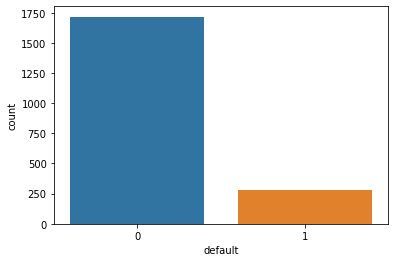

In [10]:
sns.countplot(x = base_credit['default'])#funcao faz a contagem e gera o grafico

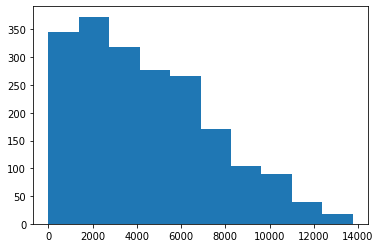

In [11]:
plt.hist(x = base_credit['loan']); #gera histograma, o ; é pra nao imprimir as imformações no começo

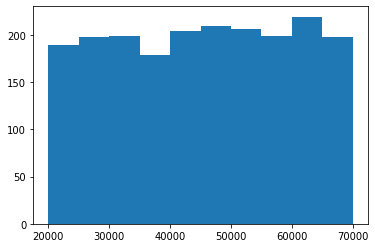

In [12]:
plt.hist(x = base_credit['income']);

In [13]:
grafico = px.scatter_matrix(base_credit, dimensions=['income', 'loan', 'age'], color = 'default') #criacao de graficos dinamicos
grafico.show()

###Tratamento de dados inconsistentes

In [14]:
base_credit.loc[base_credit['age'] < 0] #loc e um comando do pandas que faz a localização de um registro

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [15]:
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)

In [16]:
base_credit2

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [17]:
base_credit[base_credit['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [18]:
#preencher os valores inconsistente manualmente - ex: com a media das idades
base_credit['age'][base_credit['age']>0].mean()


40.92770044906149

In [19]:
base_credit.loc[base_credit['age'] < 0,'age'] = 40.92

In [20]:
base_credit.head(17) #deu erro e 40.92 ficou em todas as colunas dos ids loc
# entao nesse caso carregamos novamente a base de credito do começo e corrigimos

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


###Tratamento de valores faltantes



In [21]:
base_credit.isnull().sum() #indica que temd 3 clientes com idade faltante

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [22]:
base_credit.loc[pd.isnull(base_credit['age'])] #localiza quem é nulo na coluna age da base de credito

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [23]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True) #filna é um recurso do pandas para preencher linhas vazia, nesse caso
#estamos preenchendo com a media, e inplace =  True altera a base se nao colocarmos o inplace = true vai fazer a mudanca so na memoria

In [24]:
base_credit.loc[pd.isnull(base_credit['age'])] 

,clientid,income,age,loan,default


In [25]:
base_credit.loc[(base_credit['clientid'] == 29)|(base_credit['clientid'] == 31)|(base_credit['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


In [26]:
#outra maneira de verificar mais simples é:
base_credit.loc[base_credit['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


###Divisao entre previsores e classe (x, y)


In [27]:
X_credit = base_credit.iloc[:, 1:4].values #iloc seleciona linhas e colunas do dataframe, o 1ª parametro indica quais linhas
#: indica todas as linhas, 1:4 seleciona do 1 ao 3(income, age e loan). . values converte para formato do numpy 

In [28]:
type(X_credit) #numpy.ndarray, ja a base_credit é 'pandas.core.frame.DataFrame

numpy.ndarray

In [29]:
Y_credit = base_credit.iloc[:, 4].values

In [30]:
Y_credit

array([0, 0, 0, ..., 1, 0, 0])

###Escalonamento dos valores


In [31]:
 X_credit[:, 0].min(),  X_credit[:, 1].min(),  X_credit[:, 2].min() #visualiza os valores minimos de cada coluna

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [32]:
 X_credit[:, 0].max(),  X_credit[:, 1].max(), X_credit[:, 2].max() #visualiza os valores maximos de cada coluna

(69995.6855783239, 63.97179584112021, 13766.051239333701)

In [33]:
#podemos perceber que os valores entre os atributos sao bem discrepantes, idade para renda, por exemplo, isso pode gerar um problema nos 
#algoritimos, principalmente os que sao voltados para distancia, como o knn, entao é importante escalonar(normalização ou padronização)
#Padronização é mais indicadas quanto se tem outliers, as bibliotecas ja fazem esse calculo.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [35]:
#imprimindo novamente os valores minimos
X_credit[:, 0].min(),  X_credit[:, 1].min(),  X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [36]:
#imprimindo novamente os valores maximos
X_credit[:, 0].max(),  X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651971, 3.0616609141708273)

## Base de Dados do Census

Fonte: https://archive.ics.uci.edu/ml/datasets/adult

In [37]:
base_census = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/census.csv')

In [38]:
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
base_census.describe() 

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
base_census.isnull().sum() #nao tem dados faltantes

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [41]:
np.unique(base_census['income'],return_counts=True) # contagem de quantos registros temos em cada classe, sem o return diz so quais o tipo, e nao a qnt

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

###Graficos (CountPlot, Hist, treemap e parallel_categories)

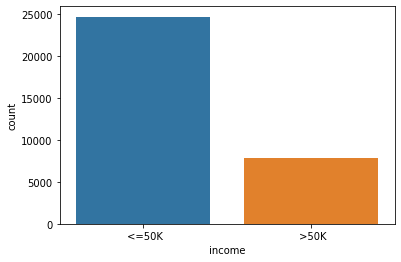

In [42]:
sns.countplot(x = base_census['income'])

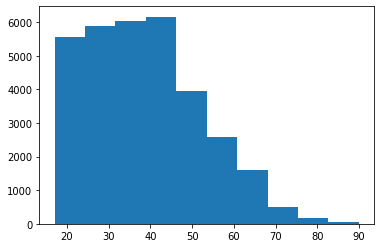

In [43]:
plt.hist(x = base_census['age']);

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

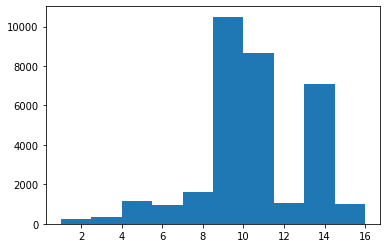

In [44]:
plt.hist(x = base_census['education-num'])

In [45]:
#grafico = px.treemap(base_census, path=['workclass','age','relationship'])
#grafico.show()


In [46]:
grafico = px.parallel_categories(base_census, dimensions=['education','income'])
grafico.show()

###Divisao entre preditores e classe

In [47]:
X_census = base_census.iloc[:, 0:14].values #.values para ficar no formato numpy array

In [48]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [49]:
Y_census = base_census.iloc[:,14].values

In [50]:
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

###Tratamento de atributos categoricos

####LabelEncoder 

In [51]:
from sklearn.preprocessing import LabelEncoder


In [52]:
label_encoder_teste = LabelEncoder() #ou seja, estamos instanciando um objeto da classe LabelEncoder

In [53]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [54]:
teste = label_encoder_teste.fit_transform(X_census[:, 1])

In [55]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [56]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [57]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [58]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

####OneHotEncoder

OneHotEnconder
O LabelEnconder atribui valores numericos o que pode ser um problema para alguns algoritimos, pois podem dar mais importancia a uns do que outros. Entao para corrigir isso o OneHot cria Xcolunas, de acorco com a quantidade de classes, e adiciona 0 ou 1

In [59]:
#exemplo do Carro
#Gol Palio Uno
#1    2     3   #LabelEncoder

# Gol   1  0  0
#Palio  0  1  0
# UNo   0  0  1

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [61]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
#remaider indica que ele nao vai apagar os atributos numericos 

In [62]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [63]:
X_census.shape #Antes tinhamos 15 colunas, agora temos 108

(32561, 108)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [65]:
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

##Divisao de Bases de Treinameto e Teste

In [66]:
from sklearn.model_selection import train_test_split

###Base de dados de crédito


In [67]:
X_credit_treinamento, X_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(X_credit, Y_credit, test_size=0.25, random_state=0)
#importante colocar o random_state para garantir que todas vez que vai rodar tenha os mesmos registros no teste e de treinamento
#test_size = 0,25, indica que 25% dos dados vao ser teste

In [68]:
X_credit_treinamento.shape

(1500, 3)

### Base de dados Census

In [69]:
X_census_treinamento, X_census_teste, Y_census_treinamento, Y_census_teste = train_test_split(X_census, Y_census, test_size=0.15, random_state=0)

In [70]:
X_census_treinamento.shape, X_census_teste.shape

((27676, 108), (4885, 108))

### Salvar Variaveis

In [71]:
import pickle #salvar variaveis em disco

In [72]:
with open('credit.pkl', mode='wb') as f: #pkl é o formato para poder usar a biblioteca
  pickle.dump([X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste],f)


In [73]:
with open('census.pkl', mode='wb') as f: 
  pickle.dump([X_census_treinamento,  Y_census_treinamento, X_census_teste, Y_census_teste],f)
  

# Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB #usado em problemas genericos

##Base Risco de Credito

In [75]:
base_risco_credito = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/risco_credito.csv')

In [76]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


###Divisao entre classes e preditores

In [77]:
X_risco_credito = base_risco_credito.iloc[:,0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [78]:
Y_risco_credito = base_risco_credito.iloc[:,4].values
Y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

###Tratamento de Atributos categoricos

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [81]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])


In [82]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

####Salvando as variaveis

In [83]:
import pickle 

In [84]:
with open('risco_credito.pkl', mode='wb') as f:
  pickle.dump([X_risco_credito, Y_risco_credito],f)

###Naive Bayes

In [85]:
naive_risco_credito = GaussianNB() #criacao do objeto
naive_risco_credito.fit(X_risco_credito, Y_risco_credito) #aqui gera aquelas tabelas de prob

GaussianNB()

In [86]:
# Historia boa (0), divida alta (0), garantia nenhuma (1), renda >35 (2)
# Historia ruim (2), divida alta (0), garantia adequada (0), renda <15 (0)
previsao = naive_risco_credito.predict([[0,0,1,2] , [2,0,0,0]])
#essa funcao predict retorna so a classe, nao retorna as probabilidades das classes

In [87]:
previsao #baixo e moderado 

array(['baixo', 'moderado'], dtype='<U8')

#### Caracteristicas

In [88]:
naive_risco_credito.classes_ #retorna o conteudo da classe

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [89]:
naive_risco_credito.class_count_ #contagem dos registros[6,5,3]

array([6., 5., 3.])

In [90]:
naive_risco_credito.class_prior_ #probabilidades a priori de cada registro

array([0.42857143, 0.35714286, 0.21428571])

In [91]:
#Verificar se tem como em uma nova versao visualizar a tabela de probabilidades


##Base Dados de Credito - 93.80%

###Gerando as previsoes

In [92]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [93]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, Y_credit_treinamento) #1ª coloca os atributos previsores

GaussianNB()

In [94]:
previsoes = naive_credit_data.predict(X_credit_teste) #importante ressaltar que aqui é a base de teste

In [95]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
Y_credit_teste 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###Analisando a eficiencia do modelo (accuracy e matriz de confusao - bib Yellowbrick

In [97]:
#comparando as previsoes com o teste
from sklearn.metrics import accuracy_score #essa funcao conta os acertos da previsao comparando com o teste
from sklearn.metrics import confusion_matrix #matriz de confusao
from sklearn.metrics import classification_report #mostra algumas metricas adicionais

In [98]:
accuracy_score(Y_credit_teste, previsoes)#recebe paramentros (y_true- valores reais, Y_false - previsoes)

0.938

In [99]:
confusion_matrix(Y_credit_teste, previsoes)
#array([[428,   8], essa linha indica os clientes que pagam o emprestimo
 #      [ 23,  41]]) #linha de clientes que nao pagam
 # é tipo a matriz de Erros. onde 428 indica os clientes que pagam e que foram classificados como quem pagam
 # 8 são os clientes que pagam mais que foram classificados como que nao pagam (falso-negativo)...

array([[428,   8],
       [ 23,  41]])

In [100]:
#Para facilitar a visualização dessa matriz vamos usar outra biblioteca
from yellowbrick.classifier import ConfusionMatrix

0.938

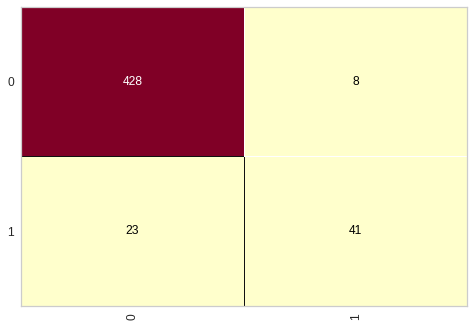

In [101]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [102]:
print(classification_report(Y_credit_teste, previsoes))
#recall: O algoritmo consegue identificar corretamente 98% dos clientes que pagam o emprestimo e qnd o 
# algoritmo identifica um cliente que paga o emprestimo ele tem uma precisao de acerto de 95%, o que 
#significa que o algoritimo tem uma otima precisao para identificar as pessoas que pagam emprestimo
#porem ele nao é tao bom para identificar as pessoas que nao pagam  os emprestimos
#ele identifica corretamente 64% dos registros que nao pagam e quando ele identifica um cliente que nao
#paga ele esta correto em 84% das vezes
#(41/(41+23))=0,64 e (41/(41+8))=0,84

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



##Base de Dados Census - 47,67%

In [103]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste,  Y_census_teste = pickle.load(f)

In [104]:
X_census_treinamento.shape, Y_census_treinamento.shape  #checando

((27676, 108), (27676,))

In [105]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, Y_census_treinamento)
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [106]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [107]:
accuracy_score(Y_census_teste, previsoes) 
#Deu muito baixo, 0,476, como so tem duas classes era melhor ter jogado uma moeda
#Detalhe se executar sem o escalonamento a acuuracidade da 70%

0.4767656090071648

0.4767656090071648

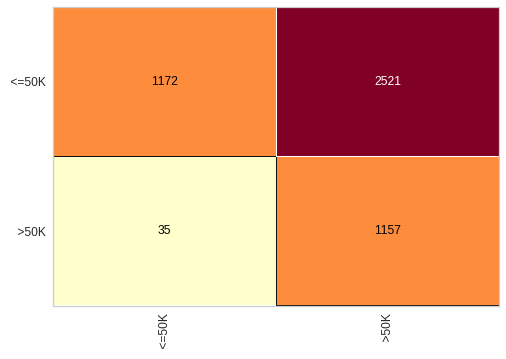

In [108]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [109]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Arvores de Decisao

In [110]:
from sklearn.tree import DecisionTreeClassifier 

##Base Risco de credito 

In [111]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, Y_risco_credito = pickle.load(f)

In [112]:
X_risco_credito, Y_risco_credito

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [113]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy') #criterion='gini' que é o calculo da impureza de gini
#onde podemos passar o calor da entropia
arvore_risco_credito.fit(X_risco_credito, Y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [114]:
arvore_risco_credito.feature_importances_ #ele vai retornar a importancia de cada um dos atributos (GAIN)

array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

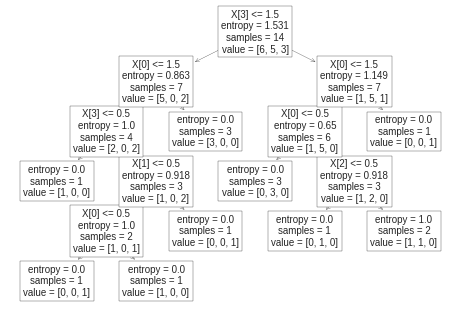

In [115]:
from sklearn import tree
tree.plot_tree(arvore_risco_credito);

In [116]:
arvore_risco_credito.classes_ #retorna o nome das classes, bom para colocar no grafico 
#da arvore no class_names

array(['alto', 'baixo', 'moderado'], dtype=object)

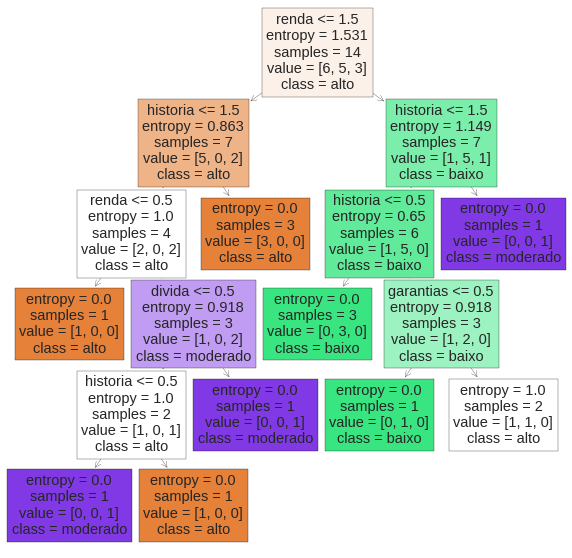

In [117]:
#Agora melhorando a visualização
from sklearn import tree
previsores = ['historia', 'divida', 'garantias', 'renda'] #para melhorar a visualização
figura, eixos  = plt.subplots(nrows=1, ncols=1, figsize=(10,10))#recursos da mathplotlib para melhorar a visualizacao
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True);
#filled=true faz um preencimento na arvore - cor para cada classe

In [118]:
# Historia boa (0), divida alta (0), garantia nenhuma (1), renda >35 (2)
# Historia ruim (2), divida alta (0), garantia adequada (0), renda <15 (0)
previsoes = arvore_risco_credito.predict([[0,0,1,2] , [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

##Base de Credito - 98,20%

###Geracao da arvore

In [119]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [120]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
#random_state=0 é para quando executarmos novamente ele gerar os mesmos resultados
arvore_credit.fit(X_credit_treinamento, Y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [121]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
#Comparando com a base de testes
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###Metricas de acuracidade e matriz de confusao

In [123]:
#Gerando as metricas
from sklearn.metrics import accuracy_score, classification_report

In [124]:
accuracy_score(Y_credit_teste, previsoes) #0,982 melhor que naive bayes (0.938)

0.982

0.982

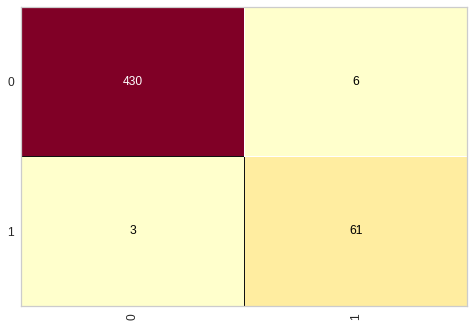

In [125]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [126]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



###Gerando o grafico da arvore

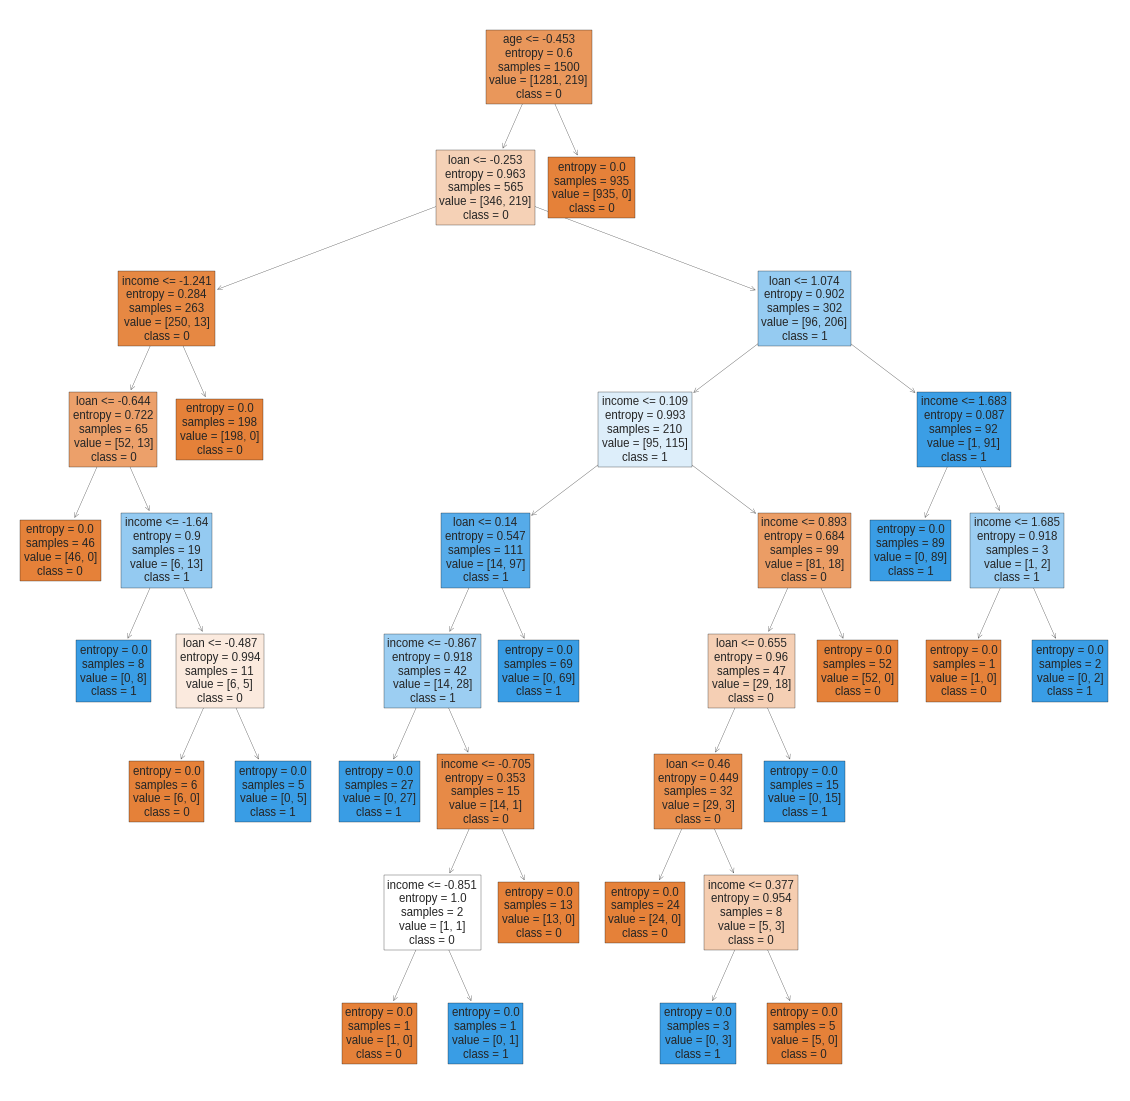

In [127]:
from sklearn import tree
previsores = ['income', 'age', 'loan'] 
figura, axes  = plt.subplots(nrows=1, ncols=1, figsize=(20,20))#recursos da mathplotlib para melhorar a visualizacao
tree.plot_tree(arvore_credit, feature_names=previsores, class_names=['0','1'], filled=True);
figura.savefig('arvore_credit.png')
#filled=true faz um preencimento na arvore - cor para cada classe


##Base do Census - 81,04%

In [128]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [129]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, Y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [130]:
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [131]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [132]:
accuracy_score(Y_census_teste, previsoes) #0,81

0.8104401228249745

0.8104401228249745

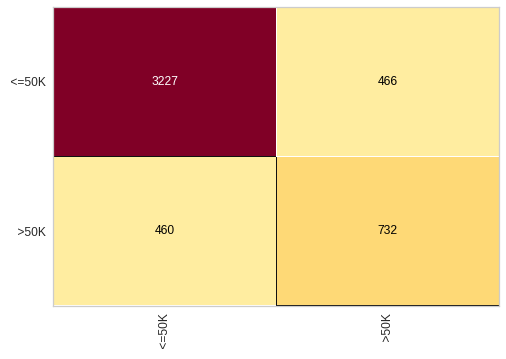

In [133]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [134]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



#Randow Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

###Base credit data - 98,4%

In [136]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste

In [137]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, Y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [138]:
previsoes = random_forest_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [139]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_credit_teste, previsoes) #0,968 deu menor do que o de arvores normais com 10 arvores
                                          #com 40 arvores deu 0,984
                                          #com 100 arvores deu 0,982 diminuiu
#Vale ressaltar que quanto mais arvores mais demorado é o codigo


0.984

0.984

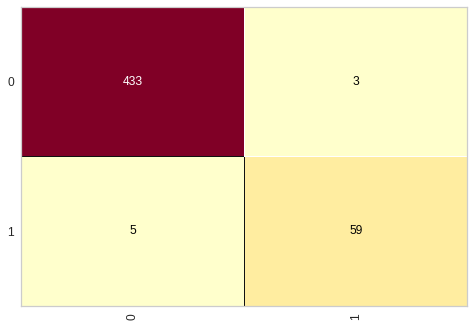

In [140]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [141]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



##Base do Census - 85,07%

In [142]:
import pickle
with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [143]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(X_census_treinamento, Y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [144]:
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [145]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)
#40 arvores -> 0,8477
#10 arvores -> 0,8391
#100 arvores -> 0,8507
#150 arvores -> 0,8505
#120 arvores -> 0,8520



0.8507676560900717

0.8507676560900717

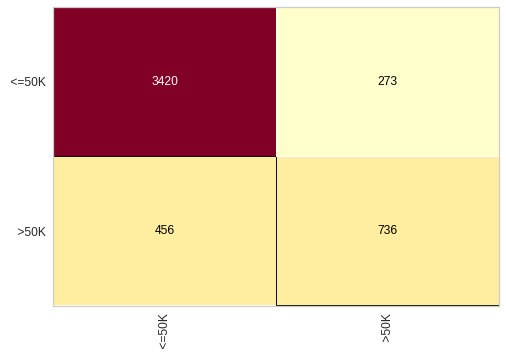

In [146]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)


In [147]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



#Regras

In [148]:
#!pip install Orange3

In [150]:
import Orange

ModuleNotFoundError: ignored

##Base Risco Credito

In [ ]:
base_risco_credito = Orange.data.Table('risco_credito_regras.csv') #nao vamos usar o pandas pq vamos deixar os dados no formato do Orange
#no classe de risco tem c#Risco

In [ ]:
base_risco_credito

In [ ]:
base_risco_credito.domain

In [ ]:
cn2 = Orange.classification.rules.CN2Learner()
regras_risco_credito = cn2(base_risco_credito)

In [ ]:
for regras in regras_risco_credito.rule_list:
  print(regras)

In [ ]:
# Historia boa, divida alta , garantia nenhuma , renda >35 
# Historia ruim , divida alta,  garantia adequada, renda <15 
previsoes = regras_risco_credito([['boa', 'alta', 'nenhuma','acima_35'] , ['ruim', 'alta', 'adequada', '0_15']])
previsoes

In [ ]:
base_risco_credito.domain.class_var.values #0=alto, 1=baixo, 2=moderado

In [ ]:
for i in previsoes:
  print(base_risco_credito.domain.class_var.values[i])

##Base de Credito - 97,4%

In [ ]:
base_credit = Orange.data.Table('credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
#dividindo em base de treinamento e base de teste
base_dividida = Orange.evaluation.testing.sample(base_credit, n =  0.25)

In [ ]:
base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [ ]:
len(base_treinamento), len(base_teste)

In [ ]:
#treinamento
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

In [ ]:
for regras in regras_credit.rule_list:
  print(regras)

In [ ]:
#previsoes na base de teste
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste, [lambda testdata: regras_credit])
#lambda provavelmente vem la de programacao funcional

In [ ]:
#Metricas
Orange.evaluation.CA(previsoes)

#Classificador base - Majority Learner

##Base de credito - 85,85%

In [ ]:
base_credit = Orange.data.Table('credit_data_regras.csv')

In [ ]:
base_credit.domain

In [ ]:
majority = Orange.classification.MajorityLearner()

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_credit, base_credit, [majority]) 
#isso indica que estamos testando na mesma base de dados, nao existe um treinamento

In [ ]:
Orange.evaluation.CA(previsoes)

In [ ]:
 for registro in base_credit:
   print(registro,  registro.get_class())

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_credit)

In [ ]:
#Isso indica que quando vamos fazer a classificacao de um novo registro eles seram classificados com 0 pois sao a 
#maioria nos dados. É interessante para termos um ponto base para avaliar os metodos, ou seja, se tivermos um algoritimo
#que acerte menos que 0,8585 é muito mais facil classificar  os registros na maioria. 

##Base do census - 75,91%

In [ ]:
base_census = Orange.data.Table('census_regras.csv')

In [ ]:
base_census.domain

In [ ]:
majority =  Orange.classification.MajorityLearner()


In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census, [majority]) 
Orange.evaluation.CA(previsoes)

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_census)

#Aprendizagem Baseada em instancias - kNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier

##Base credit Data - 98,6%

In [153]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [154]:
X_credit_treinamento.shape, Y_credit_treinamento.shape
#Vale ressaltar que os dados importados ja estao padronizados

((1500, 3), (1500,))

In [155]:
#Nao vamos fazer um treinamento
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)# 5 é valor default, minkowski é a metrica de 
#distancia que sera usada e se p=2 usa a dist euclidiana
knn_credit.fit(X_credit_treinamento, Y_credit_treinamento)

KNeighborsClassifier()

In [156]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [157]:
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [158]:
#Accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_credit_teste, previsoes)
#k = 5 -> 0,986 melhor
#k = 3 -> 0,978
#k = 20 -> 0,976
#k = 10 -> 0,974

0.986

0.986

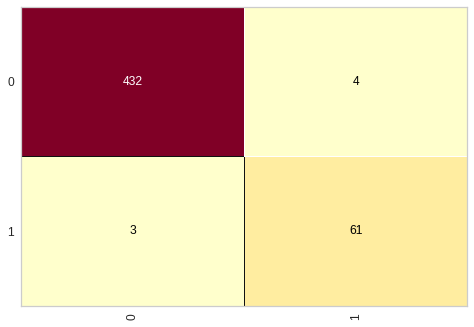

In [159]:
#gerando matriz de confusao
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [160]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



##Base de Dados Census - 82,90%

In [161]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [162]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [163]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, Y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [164]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [165]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [166]:
#Acuracidade
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)
#k=3 -> 0,8081
#k=5 -> 0,8223
#k=10 -> 0,8290

0.8290685772773797

0.8290685772773797

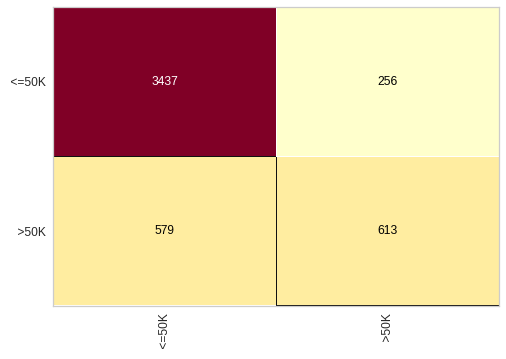

In [167]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [168]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



#Regressão Logistica

In [169]:
from sklearn.linear_model import LogisticRegression

##Base de Risco de Credito

In [170]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/risco_credito.pkl', 'rb') as f:
  X_risco_credito, Y_risco_credito = pickle.load(f)


In [171]:
X_risco_credito, Y_risco_credito #dados ja com encoding

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [172]:
#Para facilitar a primeira implementação vamos apagar os registros de classe moderada
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis=0) #axis=0 apaga linhas, axis=1 apaga colunas
Y_risco_credito = np.delete(Y_risco_credito, [2, 7, 11], axis=0)


In [173]:
Y_risco_credito

array(['alto', 'alto', 'alto', 'baixo', 'baixo', 'alto', 'baixo', 'baixo',
       'alto', 'baixo', 'alto'], dtype=object)

In [174]:
#treinamento: encontrar os parametros
logistic_risco_credit = LogisticRegression(random_state=1)
logistic_risco_credit.fit(X_risco_credito, Y_risco_credito)

LogisticRegression(random_state=1)

In [175]:
logistic_risco_credit.intercept_ #-0.8 B0

array([-0.80828993])

In [176]:
logistic_risco_credit.coef_#B1, B2, B3, B4

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [177]:
# Historia boa (0), divida alta (0), garantia nenhuma (1), renda >35 (2)
# Historia ruim (2), divida alta (0), garantia adequada (0), renda <15 (0)
previsoes = logistic_risco_credit.predict([[0,0,1,2] , [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

##Base Credit Data - 94,6%

In [178]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [179]:
X_credit_treinamento.shape, X_credit_teste.shape

((1500, 3), (500, 3))

In [180]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, Y_credit_treinamento)

LogisticRegression(random_state=1)

In [181]:
logistic_credit.intercept_, logistic_credit.coef_ #B0; B1, B2, B3

(array([-6.02976095]), array([[-2.54927091, -3.72279861,  3.93940349]]))

In [182]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [183]:
#Acurracy
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_credit_teste, previsoes)

0.946

0.946

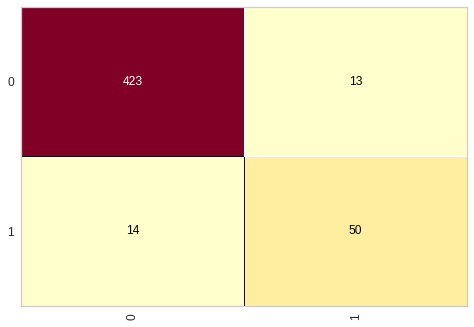

In [184]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [185]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



##Base de Dados Census - 84,95%

In [186]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [187]:
X_census_treinamento.shape

(27676, 108)

In [188]:
logistic_census = LogisticRegression(random_state=1)
logistic_census.fit(X_census_treinamento, Y_census_treinamento)

LogisticRegression(random_state=1)

In [189]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [190]:
logistic_census.intercept_

array([-2.10474165])

In [191]:
logistic_census.coef_ #muitas colunas pq fiz o encoding e o OneHot

array([[-6.94469649e-02,  1.18679159e-01, -9.04524759e-03,
        -7.81357460e-02,  5.76691457e-02,  5.08994420e-02,
        -8.82856549e-02, -5.01462809e-02, -1.42900810e-01,
        -1.04784027e-01, -1.19233556e-01, -3.77074867e-02,
        -2.08124820e-02, -2.93974652e-02, -8.45705964e-02,
        -8.08920718e-02, -8.16248852e-03,  1.09035256e-02,
         1.46893853e-01,  1.20194939e-01, -7.84325002e-02,
         1.45553932e-01, -4.75278833e-01,  1.14436730e-01,
         2.27948173e-02, -1.93347518e-01,  4.38094226e-02,
         7.07825942e-01, -6.57034078e-02, -5.23341515e-01,
        -1.09247966e-01, -8.94357349e-02, -7.42801130e-02,
        -1.40912231e-02, -2.06468670e-02,  2.21547856e-02,
         2.51784840e-01, -1.68183468e-01, -1.43046856e-01,
        -8.47285978e-02, -2.55735605e-01, -2.68986406e-01,
         1.61655356e-01,  8.57817041e-02,  8.33259769e-02,
         1.08967512e-01, -2.56717036e-02, -2.99250092e-02,
         1.37854640e-01, -8.45026445e-02, -3.08580420e-0

In [192]:
#Acuracidade
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)

0.849539406345957

0.849539406345957

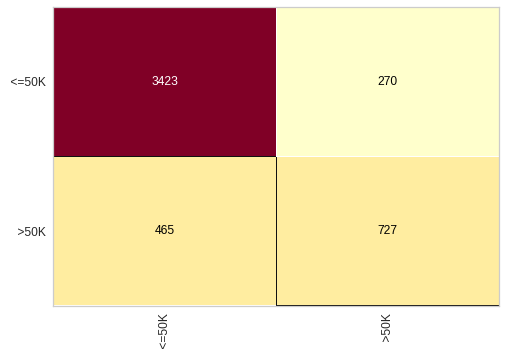

In [193]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [194]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



#Support Vector Machine - SVM

In [195]:
from sklearn.svm import SVC #detalhe que importa SVC e nao SVM

##Base Credit Data - 98,8%

In [196]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [197]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0)#Quanto maior o C mais perfeita a divisao de dados
svm_credit.fit(X_credit_treinamento,Y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [198]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [199]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_credit_teste, previsoes)
#kernel:linear, c=1 -> 0,946
#kernel:poly, c=1 -> 0,968
#kernel:sigmoid, c=1 -> 0,838
#kernel:rbf, c=1 -> 0,982 ##defaut
#kernel:rbf, c=2 -> 0,988


0.988

0.988

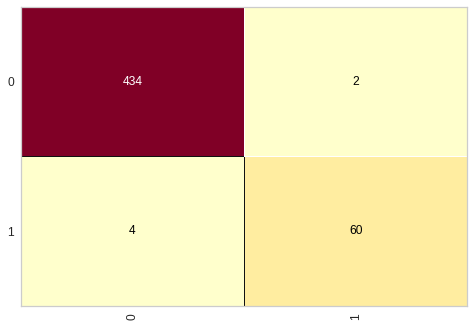

In [200]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [201]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



##Base de Dados Census - 85,07%

In [202]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [203]:
svm_census = SVC(kernel='linear', random_state=1, C=1.0)
svm_census.fit(X_census_treinamento, Y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [204]:
previsoes = svm_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [205]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [206]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)
#kernel:linear, c=1 -> 0,8507
#kernel:rbf, c=1 -> 0,8493 ##defaut


0.8507676560900717

0.8507676560900717

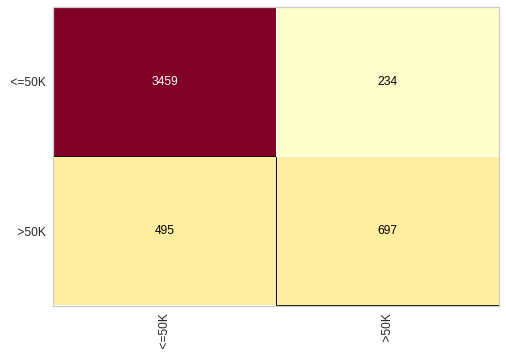

In [207]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [208]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885



#Redes Neurais

In [209]:
from sklearn.neural_network import MLPClassifier #MultiLayerPercepction

##Base Credit Data - 99,8%

In [210]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [211]:
X_credit_treinamento.shape

(1500, 3)

In [212]:
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.000010, solver = 'adam', 
                                   activation='relu', hidden_layer_sizes=(2,2)) #Verbose=True o algoritimo mostra as 
#resposta epoca por epoca. #solve=adam é para os pesos no caso -stochastic gradient-based optimize-
rede_neural_credit.fit(X_credit_treinamento, Y_credit_treinamento)

Iteration 1, loss = 0.49884275
Iteration 2, loss = 0.49422181
Iteration 3, loss = 0.48995693
Iteration 4, loss = 0.48591760
Iteration 5, loss = 0.48214567
Iteration 6, loss = 0.47858916
Iteration 7, loss = 0.47526835
Iteration 8, loss = 0.47228728
Iteration 9, loss = 0.46930285
Iteration 10, loss = 0.46662536
Iteration 11, loss = 0.46407122
Iteration 12, loss = 0.46168612
Iteration 13, loss = 0.45946061
Iteration 14, loss = 0.45732029
Iteration 15, loss = 0.45533847
Iteration 16, loss = 0.45346468
Iteration 17, loss = 0.45170588
Iteration 18, loss = 0.44999346
Iteration 19, loss = 0.44836949
Iteration 20, loss = 0.44675229
Iteration 21, loss = 0.44530192
Iteration 22, loss = 0.44389170
Iteration 23, loss = 0.44262684
Iteration 24, loss = 0.44129300
Iteration 25, loss = 0.44006683
Iteration 26, loss = 0.43893749
Iteration 27, loss = 0.43783225
Iteration 28, loss = 0.43680244
Iteration 29, loss = 0.43580511
Iteration 30, loss = 0.43486170
Iteration 31, loss = 0.43394381
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [213]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [214]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_credit_teste, previsoes)

0.998

0.998

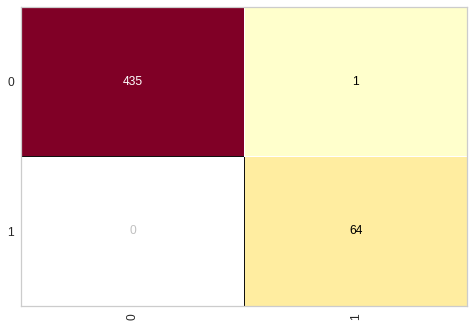

In [215]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [216]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



##Base de Dados Census - 81,57%




In [217]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [218]:
rede_neural_censo = MLPClassifier(max_iter=1500, verbose=True, tol=0.000010, solver = 'adam', 
                                   activation='relu', hidden_layer_sizes=(55,55))
rede_neural_censo.fit(X_census_treinamento, Y_census_treinamento)

Iteration 1, loss = 0.38859658
Iteration 2, loss = 0.32604155
Iteration 3, loss = 0.31427410
Iteration 4, loss = 0.30644378
Iteration 5, loss = 0.30136437
Iteration 6, loss = 0.29762452
Iteration 7, loss = 0.29460581
Iteration 8, loss = 0.29172289
Iteration 9, loss = 0.28888910
Iteration 10, loss = 0.28736750
Iteration 11, loss = 0.28572561
Iteration 12, loss = 0.28275340
Iteration 13, loss = 0.28083437
Iteration 14, loss = 0.27986637
Iteration 15, loss = 0.27727810
Iteration 16, loss = 0.27578607
Iteration 17, loss = 0.27391649
Iteration 18, loss = 0.27270040
Iteration 19, loss = 0.27048986
Iteration 20, loss = 0.26915496
Iteration 21, loss = 0.26784217
Iteration 22, loss = 0.26614787
Iteration 23, loss = 0.26484887
Iteration 24, loss = 0.26293609
Iteration 25, loss = 0.26150414
Iteration 26, loss = 0.26061718
Iteration 27, loss = 0.25905600
Iteration 28, loss = 0.25881162
Iteration 29, loss = 0.25672308
Iteration 30, loss = 0.25613729
Iteration 31, loss = 0.25461710
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1500, tol=1e-05,
              verbose=True)

In [219]:
previsoes = rede_neural_censo.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [220]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)

0.8114636642784033

0.8114636642784033

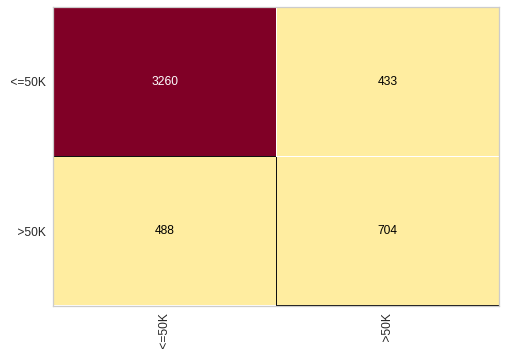

In [221]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_censo)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [222]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      3693
        >50K       0.62      0.59      0.60      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



#Avaliação dos Algoritimos

--Credit Base
* Naive Bayes : 93.80
*Árvore de Decisao: 98.20
*Random Forest: 98.40
*Regras: 97.40
*knn: 98.6
*Rgressão Logistica: 94.60
*SVM: 98.80
*Redes Neurais: 99.60

##Tuning dos Parametros com GridSearch

###Preparação dos Dados

In [223]:
from sklearn.model_selection import GridSearchCV #escolhe os melhores paramtros para cada
#um dos algoritmos, faz um pesquisa em grade, combinando todos os parâmetros.
#CV é der CrossValidition
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [224]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [225]:
X_credit_treinamento.shape, X_credit_teste.shape

((1500, 3), (500, 3))

In [226]:
#Agora como vamos aplicar a Validadação cruzada, não é necessário dividir a base de dados
# em treinamento e teste. E para concatenar usaremos o numpy
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0) #axis=0, concat linha, axis=1 concatena colunas
X_credit.shape


(2000, 3)

In [227]:
Y_credit = np.concatenate((Y_credit_treinamento, Y_credit_teste), axis=0) #axis=0, concat linha, axis=1 concatena colunas
Y_credit.shape

(2000,)

###Aŕvore de decisao

In [228]:
parametros = {'criterion': ['gini','entropy'],
              'splitter': ['best', 'random'],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 5,10]}
              

In [229]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros) #estimator indica qual é o algoritimo que vamos fazer os testes
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


###Random Forest

In [230]:
parametros = {'criterion': ['gini','entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split':[2, 5, 10],
              'min_samples_leaf':[1, 5,10]}
              

In [231]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros) #estimator indica qual é o algoritimo que vamos fazer os testes
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.9865


###Knn

In [232]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]} #p=1 usa manhattan_distance e p=2 usa distancia euclidiana

In [233]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros) #estimator indica qual é o algoritimo que vamos fazer os testes
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

#Deu menor que da primeira vez 0,986, nem sempre o grid_search acha a melhor combinação

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


###Regressão Logistica

In [234]:
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver':['lbfgs', 'sag', 'saga']}

In [235]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros) #estimator indica qual é o algoritimo que vamos fazer os testes
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


###SVM

In [236]:
parametros = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0],
              'kernel':['rbf', 'linear', 'poly','sigmoid', ]}

In [237]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros) #estimator indica qual é o algoritimo que vamos fazer os testes
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.001}
0.9829999999999999


###Redes Neurais

In [238]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver':['adam', 'sgd'],
              'batch_size': [10, 56]}


In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros) #estimator indica qual é o algoritimo que vamos fazer os testes
grid_search.fit(X_credit, Y_credit)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_


In [240]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.998


##Validação Cruzada

In [241]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i) #shuffle=True para que o algoritmo sempre mistrure esses dados
  #random_state=i para que termos 30 resultados diferentes

  #usando os melhores resultados do tunning
  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  #validação cruzada, variavels kfold divide a base de dados e é usada aqui na VC
  scores = cross_val_score(arvore, X_credit, Y_credit, cv=kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, X_credit, Y_credit, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_credit, Y_credit, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_credit, Y_credit, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, X_credit, Y_credit, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_credit, Y_credit, cv = kfold)
  resultados_rede_neural.append(scores.mean())

In [243]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Redes Neurais': resultados_rede_neural})
resultados

,Arvore,Random forest,KNN,Logistica,SVM,Redes Neurais
0,0.9860,0.9825,0.9815,0.9475,0.9845,0.9980
1,0.9845,0.9845,0.9800,0.9465,0.9840,0.9985
2,0.9905,0.9845,0.9795,0.9470,0.9865,0.9970
3,0.9870,0.9860,0.9780,0.9460,0.9850,0.9965
4,0.9890,0.9835,0.9820,0.9465,0.9850,0.9965
5,0.9890,0.9765,0.9780,0.9465,0.9845,0.9980
6,0.9885,0.9855,0.9805,0.9470,0.9860,0.9960
7,0.9875,0.9855,0.9800,0.9480,0.9850,0.9970
8,0.9855,0.9860,0.9795,0.9465,0.9840,0.9955
9,0.9875,0.9785,0.9820,0.9465,0.9845,0.9970


In [244]:
resultados.describe()

,Arvore,Random forest,KNN,Logistica,SVM,Redes Neurais
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987133,0.984200,0.980050,0.946950,0.985083,0.997100
std,0.001871,0.002314,0.001533,0.000687,0.001280,0.000649
min,0.983000,0.976500,0.977000,0.945500,0.982000,0.995500
25%,0.986000,0.983500,0.979000,0.946500,0.984125,0.997000
50%,0.987250,0.984500,0.980000,0.947000,0.985000,0.997000
75%,0.988500,0.985500,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988000,0.982500,0.948500,0.987500,0.998500


In [245]:
coeficiente_variacao = (resultados.std() / resultados.mean()) * 100
coeficiente_variacao

Arvore           0.189490
Random forest    0.235127
KNN              0.156446
Logistica        0.072517
SVM              0.129977
Redes Neurais    0.065049
dtype: float64

##Teste de Normalidade nos resultados

In [246]:
alpha = 0.05

In [247]:
from scipy.stats import shapiro


H0: Os resultados seguem uma distribuição Normal
H1: O resutlados não seguem uma distribuição Normal

Se value-p for menor ou igual a alpha rejeita H0, ou seja, os dados nao seguem uma distribuição normal

So a Redes neurais que nao sao normais, mas nao foi calculado aqui. Como todos os outros foram normais podemos aplicar os metodos de ANOVA e TURKEY




In [248]:
shapiro(resultados_arvore), shapiro(resultados_random_forest),shapiro(resultados_knn), shapiro(resultados_logistica),  shapiro(resultados_svm), shapiro(resultados_rede_neural)

((0.9693061113357544, 0.5203664898872375),
 (0.8586592674255371, 0.0009464169852435589),
 (0.9584026336669922, 0.28181564807891846),
 (0.9370993375778198, 0.07600117474794388),
 (0.962294340133667, 0.35407164692878723),
 (0.9212109446525574, 0.0288360845297575))

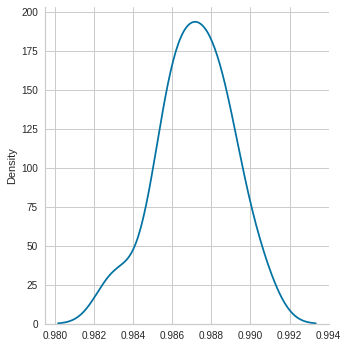

In [249]:
sns.displot(resultados_arvore, kind = 'kde'); #kind=kde para plotar a linha ao inves do histograma tradicional

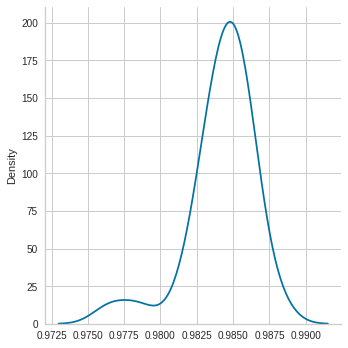

In [250]:
sns.displot(resultados_random_forest, kind = 'kde')

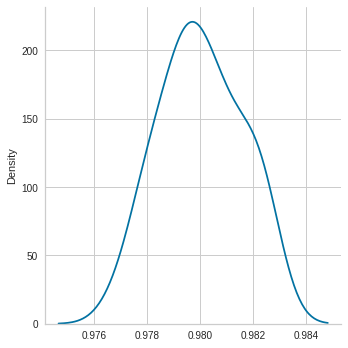

In [251]:
sns.displot(resultados_knn, kind = 'kde')

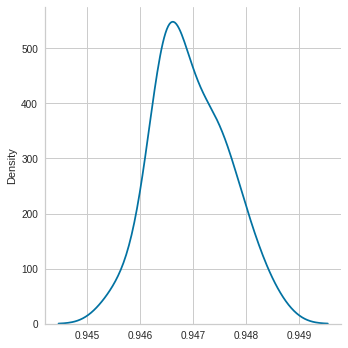

In [252]:
sns.displot(resultados_logistica, kind = 'kde')

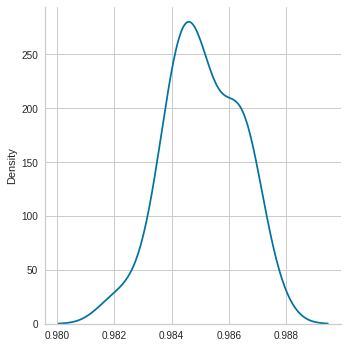

In [253]:
sns.displot(resultados_svm, kind = 'kde')

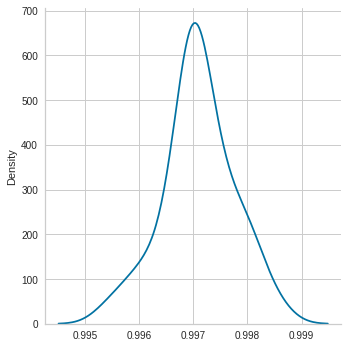

In [254]:
sns.displot(resultados_rede_neural, kind = 'kde')

##Teste de Hipoteses ANOVA e TUKEY

In [255]:
from scipy.stats import f_oneway

In [256]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

2.3857319748288354e-176

In [257]:
alpha = 0.05
if p<=alpha:
  print('Hipotese Nula Rejeitada, ou seja, os dados são estatisticamente diferentes')
else:
  print('Hipotese Alternativa Rejeitada, ou seja, os dados mão são estatisticamente diferentes')

Hipotese Nula Rejeitada, ou seja, os dados são estatisticamente diferentes


In [258]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore', 
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest', 
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn', 
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [259]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9890,arvore
...,...,...
175,0.9975,rede_neural
176,0.9970,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [260]:
from statsmodels.stats.multicomp import MultiComparison

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [261]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [262]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071  0.001 -0.0082  -0.006   True
       arvore     logistica  -0.0402  0.001 -0.0413 -0.0391   True
       arvore random_forest  -0.0029  0.001 -0.0041 -0.0018   True
       arvore   rede_neural     0.01  0.001  0.0088  0.0111   True
       arvore           svm  -0.0021  0.001 -0.0032 -0.0009   True
          knn     logistica  -0.0331  0.001 -0.0342  -0.032   True
          knn random_forest   0.0042  0.001   0.003  0.0053   True
          knn   rede_neural    0.017  0.001  0.0159  0.0182   True
          knn           svm    0.005  0.001  0.0039  0.0062   True
    logistica random_forest   0.0373  0.001  0.0361  0.0384   True
    logistica   rede_neural   0.0501  0.001   0.049  0.0513   True
    logistica           svm   0.0381  0.001   0.037  0.0393   

In [263]:
resultados.mean()

Arvore           0.987133
Random forest    0.984200
KNN              0.980050
Logistica        0.946950
SVM              0.985083
Redes Neurais    0.997100
dtype: float64

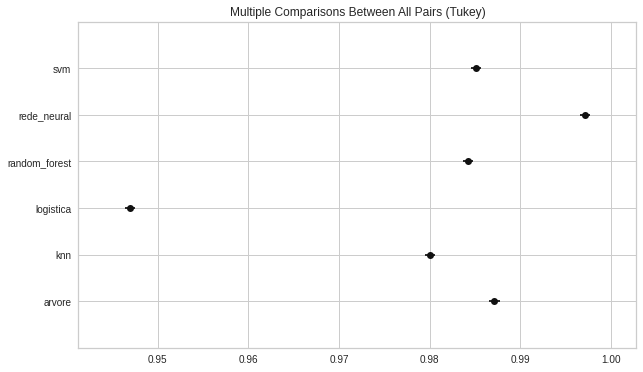

In [264]:
 teste_estatistico.plot_simultaneous();

##Salvar um classificar treinado

In [265]:
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [266]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis=0) #axis=0, concat linha, axis=1 concatena colunas
Y_credit = np.concatenate((Y_credit_treinamento, Y_credit_teste), axis=0) #axis=0, concat linha, axis=1 concatena colunas


In [267]:
#Escolhendo os 3 que tiveram melhores resultados para salvar
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [268]:
#parametros do tunning
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, Y_credit)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [269]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, Y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [270]:
classificador_svm = SVC(C = 2.0, kernel='rbf', probability=True) #probability=true para poder calcular as prob e conf na parte de rejeicão de classificadores
classificador_svm.fit(X_credit, Y_credit)

SVC(C=2.0, probability=True)

In [271]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb')) #extensao .sav é a usada pelo sklearn
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

##Carregar um classificador ja treinado

In [272]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [273]:
novo_registro = X_credit[1999]
novo_registro, novo_registro.shape

(array([-1.03572293, -0.93978122,  0.04244312]), (3,))

In [274]:
#processar esse dados pois deu erro,
novo_registro = novo_registro.reshape(1,-1) #igual como no erro
novo_registro.shape


(1, 3)

In [275]:
rede_neural.predict(novo_registro)

array([1])

In [276]:
arvore.predict(novo_registro)

array([1])

In [277]:
svm.predict(novo_registro)

array([1])

##Combinação de Classificadores

In [278]:
novo_registro = X_credit[0]
novo_registro = novo_registro.reshape(1,-1) #igual como no erro formato de matriz
novo_registro, novo_registro.shape

(array([[-1.3754462 ,  0.50631087,  0.10980934]]), (1, 3))

In [279]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [280]:
resposta_rede_neural, resposta_arvore, resposta_svm

(array([0]), array([0]), array([0]))

In [281]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_arvore[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resposta_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o empréstimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o empréstimo')

Cliente pagará o empréstimo


##Rejeição de Classificadores

Parece com o conceito de veto de analise de multicriterio

In [282]:
novo_registro = X_credit[0]
novo_registro = novo_registro.reshape(1,-1) #igual como no erro formato de matriz
novo_registro, novo_registro.shape

(array([[-1.3754462 ,  0.50631087,  0.10980934]]), (1, 3))

In [283]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [284]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]
#Aqui vai retornar apenas a classe, e para trabalhar com rejeição é preciso as prpbabilidades

(0, 0, 0)

In [285]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_arvore = arvore.predict_proba(novo_registro)
probabilidade_svm = svm.predict_proba(novo_registro)

probabilidade_rede_neural, probabilidade_arvore, probabilidade_svm #prob de 1, prob de 0

(array([[1.00000000e+00, 2.33341489e-16]]),
 array([[1., 0.]]),
 array([[9.99996717e-01, 3.28321118e-06]]))

In [286]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_arvore = probabilidade_arvore.max()
confianca_svm = probabilidade_svm.max()
confianca_rede_neural, confianca_arvore, confianca_svm

(0.9999999999999998, 1.0, 0.9999967167888167)

In [287]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritimos = 0

if confianca_rede_neural >= confianca_minima:
  algoritimos += 1
  if resposta_rede_neural[0]==1:
    nao_paga +=1
  else:
    paga +=1

if confianca_arvore >= confianca_minima:
  algoritimos += 1
  if resposta_arvore[0]==1:
    nao_paga +=1
  else:
    paga +=1

if confianca_svm >= confianca_minima:
  algoritimos += 1
  if resposta_svm[0]==1:
    nao_paga +=1
  else:
    paga +=1

if paga > nao_paga:
  print('Cliente pagará o emprestimo, baseado em {} algoritmos'.format(algoritimos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritimos))
else:
  print('Cliente nao pagará o emprestimo, baseado em {} algoritmos'.format(algoritimos))

Cliente pagará o emprestimo, baseado em 2 algoritmos
